<a href="https://colab.research.google.com/github/T-NIKHIL/Simple-Heat-Exchange-Model/blob/main/heat_exchange_nthota2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<<< USER INPUT SECTION >>>

First lets import the classes we would be using

In [ ]:
# Co-written by Nikhil Thota & Tushar Nichakawade

import numpy as np
import matplotlib.pyplot as plt
import random

Lets define our initial conditions, number of iterations, and some common arrays we will use throughout the program

In [ ]:
# Enter the initial microstate
# Example : [1,4] E=1 (e1)
#           [1,0] E=2 (e2)
#           [1,0] E=3 (e3)
#           [1,0] E=4 (e4)
microstate = np.array([[1,4],[1,0],[1,0],[1,0]])

# Input number of timesteps you want the simulation to run for
n = 100000

# Define solution matrices for left and right states
leftstates = np.zeros((4,n))
rightstates = np.zeros((4,n))

# Append initial microstate to solution matrix
leftstates[:,0] = microstate[:,0]
rightstates[:,0] = microstate[:,1]


This block contains the list of functions used in the program

In [ ]:
def Particle_Picker(microstate):
  
  # Try upto 10000 times to find a particle that meet our criteria 
  for i in range (0,10000):
  
    # Randomly pick a side. 0 = left, 1 = right
    side1 = random.randint(0,1)
    side2 = random.randint(0,1)

    # Randomly pick a row index. 0 = e1, 1 = e2, 2 = e3, 3 = e4
    energy1 = random.randint(0,3)
    energy2 = random.randint(0,3)

    # Get the number of particles in the energy levels based on the side
    numParticlesEnergy1 = microstate[energy1,side1]
    numParticlesEnergy2 = microstate[energy2,side2]

    # if numParticlesEnergy1 and numParticlesEnergy2 both greater than 0 then we can proceed with further evaluation
    if numParticlesEnergy1 > 0 and numParticlesEnergy2 > 0:
      # If we are working in the same side and we picked the same energy level then we have to make sure sure we have greater than 2 particles
      if ((side1 == 0 and side2 == 0) or (side1 == 1 and side2 == 1)) and (energy1 == energy2):
        # Just choose any variable numParticlesEnergy1 or numParticlesEnergy2 as they both reference the same energy level on same side
        if (numParticlesEnergy1 > 2):
          return side1, side2, energy1, energy2
          break 
      else:
        return side1, side2, energy1, energy2
        break

# Change the energy of both sides, with the energychange designated in left side
def ChangeMicrostate(microstate,side1, side2, energy1, energy2, energychange):
    microstate[energy1,side1] -= 1
    microstate[energy1 + energychange,side1] +=1
    microstate[energy2,side2] -= 1
    microstate[energy2 - energychange,side2] += 1

# Calculating the energy difference between left and right side
def calculateEnergyDiff(leftstates,rightstates):
    E = np.array(([1,2,3,4]))
    Eleft = np.dot(E,leftstates)
    Eright = np.dot(E,rightstates)
    return Eleft-Eright, Eleft, Eright

# For creating the autocorrelation plot
def autoCorrelation(Eleft):
  # Calculating the average of the left energy system
  y_avg = np.mean(Eleft)
  tau = np.arange(0,100)
  # Creating array to store the autocorrelation values
  CyArr = np.zeros(shape=(100,),dtype=float)
  den = 0

  for j in tau:
    
    # Reset steps
    l = 0
    num = 0
    
    while True:
      num = num + (Eleft[l] - y_avg)*(Eleft[l + j] - y_avg)
      if j == 0 :
        den = den + (Eleft[l] - y_avg)*(Eleft[l] - y_avg)          
      l = l + 1  
      # If an array index is reached which surpasses Eleft limits then break.       
      if (l + j > n - 1) :
        break
    
    Cy = num/den
    CyArr[j] = Cy  
  
  return CyArr, tau

Now lets move onto combining all the functions into a main loop

In [ ]:
for i in range (1,n):

  # Pick a particle based on its index in the microstate
  side1, side2, energy1, energy2 = Particle_Picker(microstate)

  # Lets first deal with set of particles located in energy 1 and energy 4
  if (energy1 == 0) and (energy2 == 0):
    leftstates[:,i] = leftstates[:,i-1]
    rightstates[:,i] = rightstates[:,i-1]
    continue

  elif (energy1 == 3) and (energy2 == 3):
    leftstates[:,i] = leftstates[:,i-1]
    rightstates[:,i] = rightstates[:,i-1]
    continue

  # Cases where on particle is in highest or lowest energy levels - Only one way for particle to exchange energy
  elif energy1 == 0 and energy2 > 0:
      ChangeMicrostate(microstate,side1,side2,energy1,energy2,1)
      leftstates[:,i] = microstate[:,0]
      rightstates[:,i] = microstate[:,1]
      continue 

  elif energy1 == 3 and energy2 < 3:
      ChangeMicrostate(microstate,side1,side2,energy1,energy2,-1)
      leftstates[:,i] = microstate[:,0]
      rightstates[:,i] = microstate[:,1]
      continue

  elif energy2 == 0 and energy1 > 0:
      ChangeMicrostate(microstate,side1,side2,energy1,energy2,-1)
      leftstates[:,i] = microstate[:,0]
      rightstates[:,i] = microstate[:,1]
      continue

  elif energy2 == 3 and energy1 < 3:
      ChangeMicrostate(microstate,side1,side2,energy1,energy2,1)
      leftstates[:,i] = microstate[:,0]
      rightstates[:,i] = microstate[:,1]
      continue
  # Case when both particles are in intermediate energy levels - particles can exchange energy in either direction - performing a coin toss 
  else:
      # Choosing a particle to increase energy by coin flip
      randomdirection = random.choice((-1,1))
      ChangeMicrostate(microstate,side1,side2,energy1,energy2,randomdirection)
      leftstates[:,i] = microstate[:,0]
      rightstates[:,i] = microstate[:,1]
      continue

energyDiffArr,energyL,energyR = calculateEnergyDiff(leftstates,rightstates)

Lets plot some graphs!

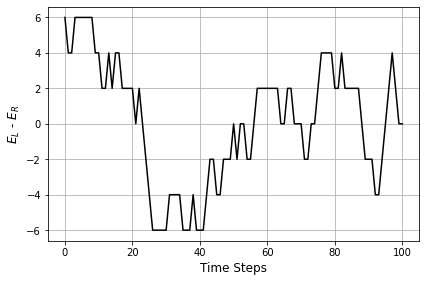

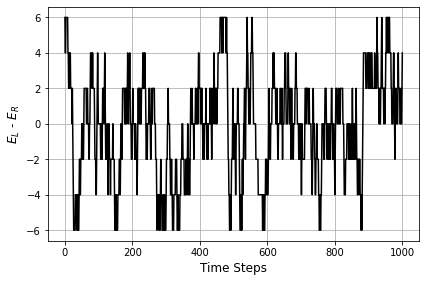

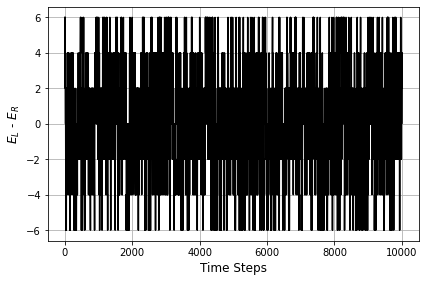

In [ ]:
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12)

fig1, ax1 = plt.subplots()
ax1.plot(np.arange(0,101,1),energyDiffArr[0:101],'-k')
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('$E_L$ - $E_R$')
ax1.grid()

fig1.tight_layout(pad=1)
 
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(np.arange(0,1001,1),energyDiffArr[0:1001],'-k')
ax2.set_xlabel('Time Steps')
ax2.set_ylabel('$E_L$ - $E_R$')
ax2.grid()

fig2.tight_layout(pad=1)
 
plt.show()

fig3, ax3 = plt.subplots()
ax3.plot(np.arange(0,10001,1),energyDiffArr[0:10001],'-k')
ax3.set_xlabel('Time Steps')
ax3.set_ylabel('$E_L$ - $E_R$')
ax3.grid()

fig3.tight_layout(pad=1)
 
plt.show()

Plotting the autocorrelation function

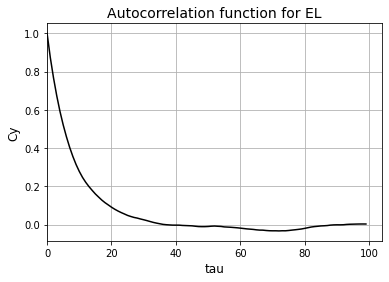

In [ ]:
CyArr, tau = autoCorrelation(energyL)

plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=12)

fig4, ax4 = plt.subplots()
ax4.plot(tau,CyArr,'-k',markersize=2)
ax4.set_xlabel("tau")
ax4.set_ylabel("Cy")
ax4.set_xlim(left=0)
ax4.set_title("Autocorrelation function for EL")
ax4.grid()

plt.show()

Plotting the energy distributions of the left and right systems. Also the energy distribution of the energyDiffArr

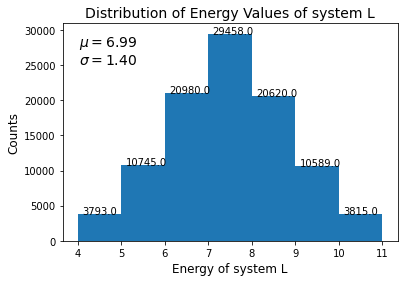

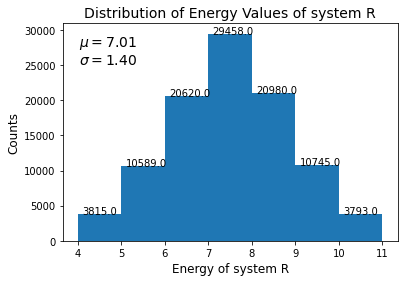

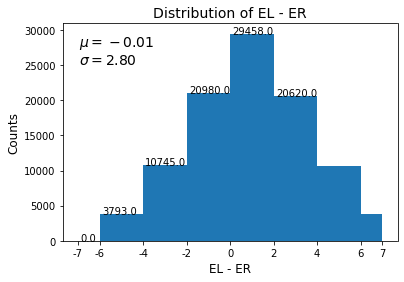

In [ ]:
# Energy Distribution left system

fig5, ax5 = plt.subplots()

hist1 = ax5.hist(energyL,[4,5,6,7,8,9,10,11],histtype='bar',orientation='vertical')
ax5.set_xticks([4,5,6,7,8,9,10,11])
ax5.set_xticklabels([4,5,6,7,8,9,10,11])
ax5.set_xlabel('Energy of system L')
ax5.set_ylabel('Counts')
ax5.set_title('Distribution of Energy Values of system L')

mu_L = np.mean(energyL)
sigma_L = np.std(energyL)
textstr1 = '\n'.join((r'$\mu=%.2f$' % (mu_L, ),r'$\sigma=%.2f$' % (sigma_L, )))
ax5.text(0.05, 0.95, textstr1, transform=ax5.transAxes, fontsize=14,verticalalignment='top')
for i in range(7):
	ax5.text(hist1[1][i] + 0.1,hist1[0][i] + 0.1,str(hist1[0][i]))
    
plt.show()

# Energy Distribution Right system

fig6, ax6 = plt.subplots()

hist2 = ax6.hist(energyR,[4,5,6,7,8,9,10,11],histtype='bar',orientation='vertical')
ax6.set_xticks([4,5,6,7,8,9,10,11])
ax6.set_xticklabels([4,5,6,7,8,9,10,11])
ax6.set_xlabel('Energy of system R')
ax6.set_ylabel('Counts')
ax6.set_title('Distribution of Energy Values of system R')

mu_R = np.mean(energyR)
sigma_R = np.std(energyR)
textstr2 = '\n'.join((r'$\mu=%.2f$' % (mu_R, ),r'$\sigma=%.2f$' % (sigma_R, )))
ax6.text(0.05, 0.95, textstr2, transform=ax6.transAxes, fontsize=14,verticalalignment='top')
for i in range(7):
	ax6.text(hist2[1][i] + 0.1,hist2[0][i] + 0.1,str(hist2[0][i]))

plt.show()

# Energy Distribution of energyDiffArr

fig7, ax7 = plt.subplots()

hist3 = ax7.hist(energyDiffArr,[-7,-6,-4,-2,0,2,4,6,7],histtype='bar',orientation='vertical')
ax7.set_xticks([-7,-6,-4,-2,0,2,4,6,7])
ax7.set_xticklabels([-7,-6,-4,-2,0,2,4,6,7])
ax7.set_xlabel('EL - ER')
ax7.set_ylabel('Counts')
ax7.set_title('Distribution of EL - ER')

mu_diff = np.mean(energyDiffArr)
sigma_diff = np.std(energyDiffArr)
textstr3 = '\n'.join((r'$\mu=%.2f$' % (mu_diff, ),r'$\sigma=%.2f$' % (sigma_diff, )))
ax7.text(0.05, 0.95, textstr3, transform=ax7.transAxes, fontsize=14,verticalalignment='top')
for i in range(6):
	ax7.text(hist3[1][i] + 0.1,hist3[0][i] + 0.1,str(hist3[0][i]))

plt.show()



Randon number generator based code for the microcanonical ensemble. The probability of each energy level is equal to the width of each range in the total random integer range


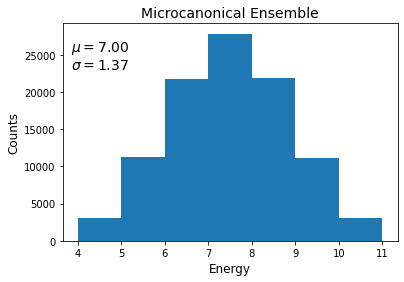

In [ ]:
# Generate a microcannonical ensemble with 100000 states
ensemble = np.zeros((1,n))
    
# For each iteration generate a random number, and depending on its value
# Assign it an energy level. The range for each level is proprportional to 
# The probability of that microstate in the range of random numbers
for i in range (0,n):
    value = random.randint(1,1428)       
    if value <= 44:
        ensemble[0,i] = 4
        continue
    elif value <= 204:
        ensemble[0,i] = 5
        continue
    elif value <= 514:
        ensemble[0,i] = 6
        continue
    elif value <= 914:
        ensemble[0,i] = 7
        continue
    elif value <= 1224:
        ensemble[0,i] = 8
        continue
    elif value <= 1384:
        ensemble[0,i] = 9
        continue
    elif value <= 1428:
        ensemble[0,i] = 10
        continue

# Generate a histogram and plot
fig8, ax8 = plt.subplots()

hist3 = ax8.hist(ensemble.reshape(100000,),[4,5,6,7,8,9,10,11],histtype='bar',orientation='vertical')
ax8.set_xticks([4,5,6,7,8,9,10,11])
ax8.set_xticklabels([4,5,6,7,8,9,10,11])
ax8.set_xlabel('Energy')
ax8.set_ylabel('Counts')
ax8.set_title('Microcanonical Ensemble')

mu_CE = np.mean(ensemble)
sigma_CE = np.std(ensemble)
textstr1 = '\n'.join((r'$\mu=%.2f$' % (mu_CE, ),r'$\sigma=%.2f$' % (sigma_CE, )))
ax8.text(0.05, 0.95, textstr1, transform=ax5.transAxes, fontsize=14,verticalalignment='top')
plt.show()
